In [53]:
!pip install yfinance pandas requests beautifulsoup4 plotly


# Tesla and GameStop Stock & Revenue Analysis
This notebook contains solutions to the final project lab questions involving data extraction and dashboard creation using Python.

In [54]:
# Import required libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Question 1: Extracting Tesla Stock Data Using yfinance

In [55]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping

In [56]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
html = StringIO(str(soup))

tables = pd.read_html(html)
tesla_revenue = tables[1]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r'[$,]', '', regex=True).astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue.head()




,Date,Revenue
0,2025-03-31,19335.0
1,2024-12-31,25707.0
2,2024-09-30,25182.0
3,2024-06-30,25500.0
4,2024-03-31,21301.0


## Question 3: Extracting GameStop Stock Data Using yfinance

In [57]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping

In [58]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
html = StringIO(str(soup))

tables = pd.read_html(html)
gamestop_revenue = tables[1]
gamestop_revenue.columns = ["Date", "Revenue"]
gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].replace(r'[$,]', '', regex=True).astype(float)
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"])
gamestop_revenue.head()




,Date,Revenue
0,2025-04-30,732.0
1,2025-01-31,1283.0
2,2024-10-31,860.0
3,2024-07-31,798.0
4,2024-04-30,882.0


## Question 5: Tesla Stock and Revenue Dashboard

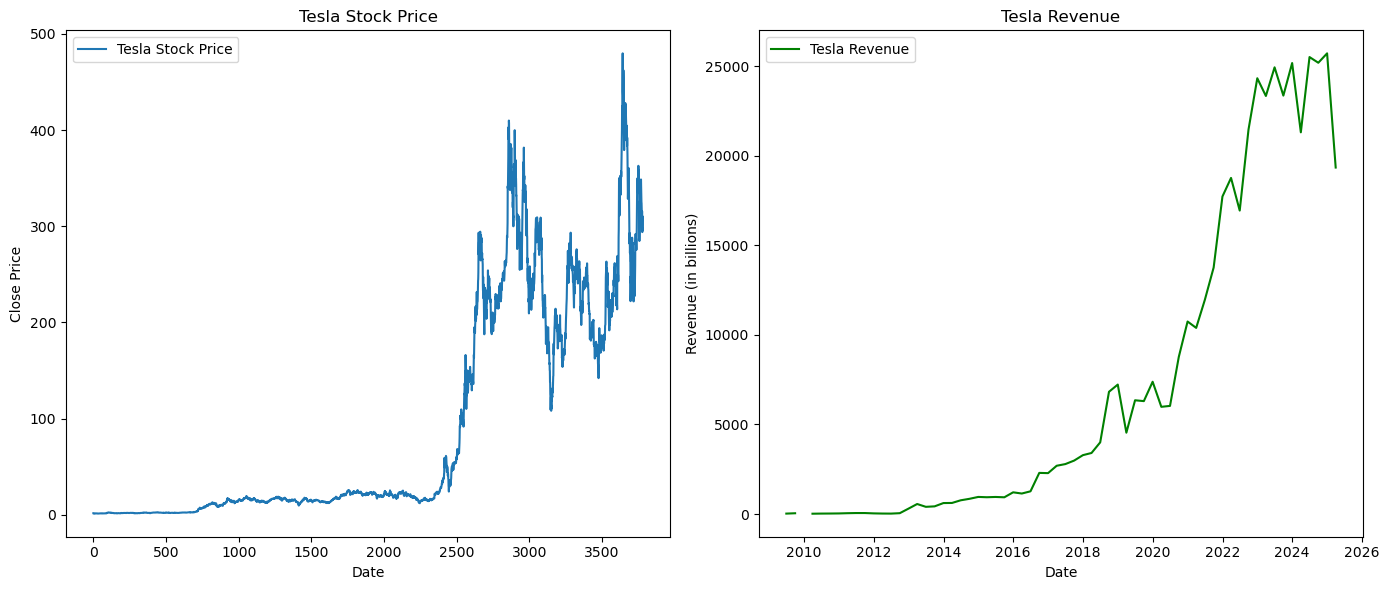

In [59]:
import matplotlib.pyplot as plt

# Check if both dataframes exist
if 'tesla_data' in globals() and 'tesla_revenue' in globals():
    plt.figure(figsize=(14, 6))

    # Plot stock price
    plt.subplot(1, 2, 1)
    plt.plot(tesla_data.index, tesla_data['Close'], label='Tesla Stock Price')
    plt.title('Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    # Plot revenue
    plt.subplot(1, 2, 2)
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', label='Tesla Revenue')
    plt.title('Tesla Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue (in billions)')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Tesla data or revenue missing—please check earlier cells.")




## Question 6: GameStop Stock and Revenue Dashboard

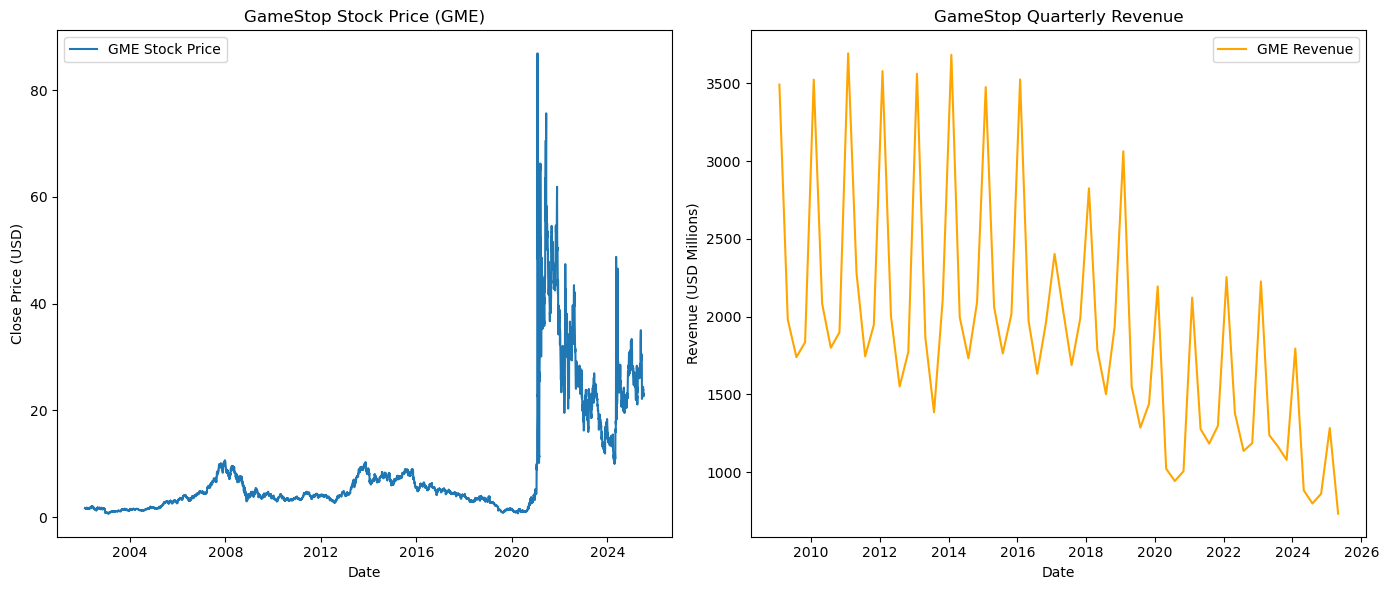

In [60]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt

# Fetch GameStop stock price data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Scrape GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Fix: Wrap soup in StringIO to avoid FutureWarning
tables = pd.read_html(StringIO(str(soup)))

# Clean the revenue table
if len(tables) > 1:
    gme_revenue = tables[1]
    gme_revenue.columns = ['Date', 'Revenue']
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
else:
    print("GameStop revenue data not found.")
    gme_revenue = None

# Plotting the dashboard
if gme_data is not None and gme_revenue is not None:
    plt.figure(figsize=(14, 6))

    # GameStop stock price plot
    plt.subplot(1, 2, 1)
    plt.plot(gme_data.index, gme_data['Close'], label="GME Stock Price")
    plt.title("GameStop Stock Price (GME)")
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.legend()

    # GameStop revenue plot
    plt.subplot(1, 2, 2)
    plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='orange', label="GME Revenue")
    plt.title("GameStop Quarterly Revenue")
    plt.xlabel("Date")
    plt.ylabel("Revenue (USD Millions)")
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("GameStop data or revenue missing—please check earlier cells.")


